In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv('BSRT Client Numbers.csv',index_col=0,parse_dates=True)
data.head()

,1st drop,2nd drop
Date,,
2018-02-03,30,15
2018-02-24,25,9
2018-03-03,30,15
2018-02-05,30,17
2018-03-05,30,12


In [3]:
data['Count'] = data["1st drop"] + data["2nd drop"]
#data["Day of week"] = data.index.dayofweek
#data["Day of month"] = data.index.day
#data["Month"] = data.index.month
data.head()

,1st drop,2nd drop,Count
Date,,,
2018-02-03,30,15,45
2018-02-24,25,9,34
2018-03-03,30,15,45
2018-02-05,30,17,47
2018-03-05,30,12,42


In [4]:
train=data[0:110]
test=data[110:]

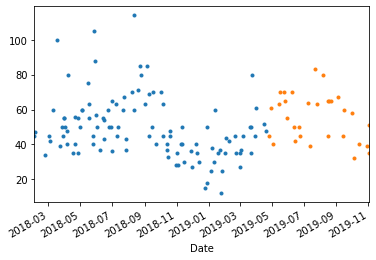

In [5]:
train["Count"].plot(style=".")
test["Count"].plot(style=".")
plt.show()

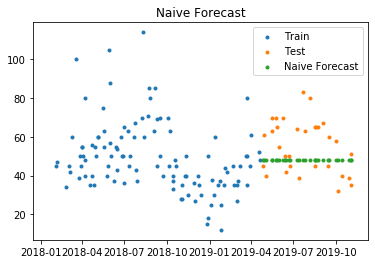

In [6]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.scatter(train.index, train.Count, marker=".",label='Train')
plt.scatter(test.index, test.Count, marker=".",label='Test')
plt.scatter(y_hat.index,y_hat['naive'], marker=".",label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [7]:
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

15.22942821877984


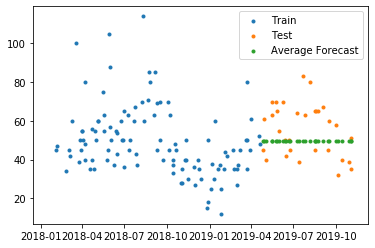

In [9]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.scatter(train.index, train.Count, marker=".",label='Train')
plt.scatter(test.index, test.Count, marker=".",label='Test')
plt.scatter(y_hat_avg.index,y_hat_avg['avg_forecast'], marker=".",label='Average Forecast')
plt.title("Average Forecast")
plt.legend(loc='best')
plt.show()

In [10]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

14.593968216051532


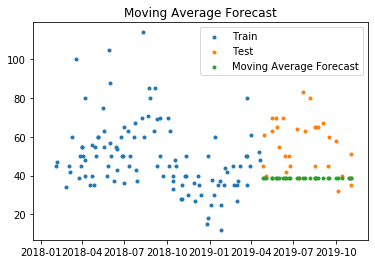

In [21]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(30).mean().iloc[-1]
plt.scatter(train.index,train['Count'], marker=".", label='Train')
plt.scatter(test.index, test['Count'], marker=".", label='Test')
plt.scatter(y_hat_avg.index, y_hat_avg['moving_avg_forecast'], marker=".", label='Moving Average Forecast')
plt.title("Moving Average Forecast")
plt.legend(loc='best')
plt.show()

In [22]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

21.289366656067703


In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

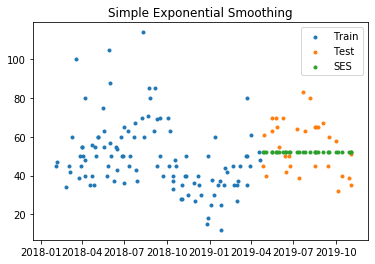

In [28]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

plt.scatter(train.index,train['Count'], marker='.', label='Train')
plt.scatter(test.index,test['Count'], marker='.',label='Test')
plt.scatter(y_hat_avg.index,y_hat_avg['SES'], marker='.',label='SES')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

In [27]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print(rms)

13.594964499935655
